In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

In [180]:
df = pd.read_csv ("C:\\Users\\DaMol\\OneDrive\\Рабочий стол\\Домашние задания\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V6\\DATA\\Ames_Housing_Data.csv")

In [181]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [182]:
# ИССЛЕДОВАНИЕ ДАННЫХ

In [183]:
with open ("C:\\Users\\DaMol\\OneDrive\\Рабочий стол\\Домашние задания\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V6\\DATA\\Ames_Housing_Feature_Description.txt", 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [185]:
df.corr()['SalePrice'].sort_values(ascending = False).iloc[:5]

SalePrice       1.000000
Overall Qual    0.799262
Gr Liv Area     0.706780
Garage Cars     0.647877
Garage Area     0.640401
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

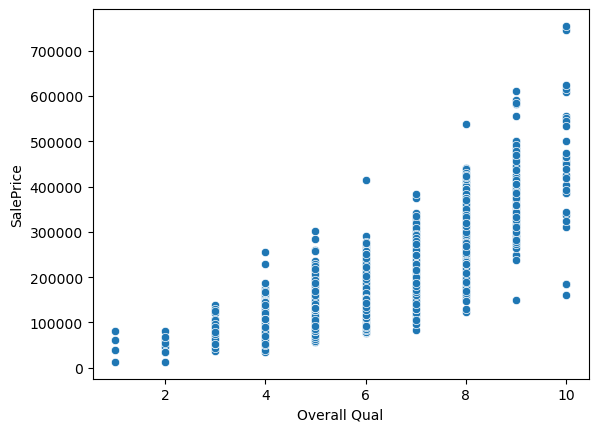

In [186]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

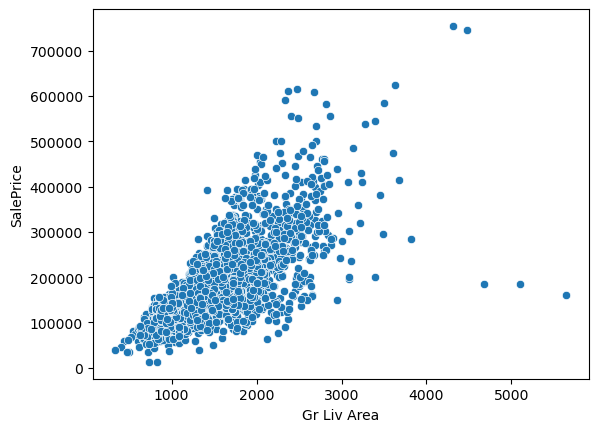

In [187]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

In [188]:
# ОЧИСТКА ДАННЫХ

In [189]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [190]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [191]:
drop_ind = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)].index
drop_ind

Int64Index([1498, 2180, 2181], dtype='int64')

In [192]:
df = df.drop(drop_ind, axis = 0)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

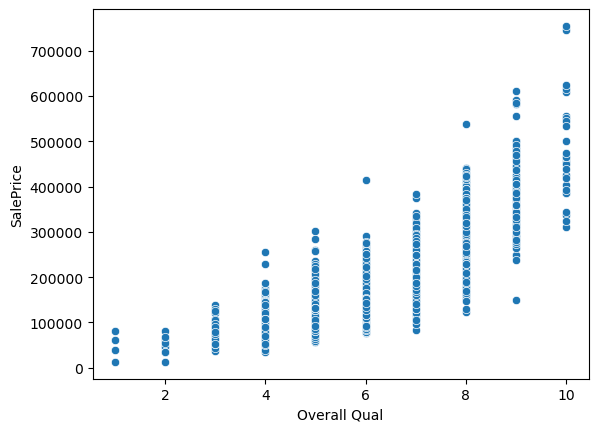

In [193]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

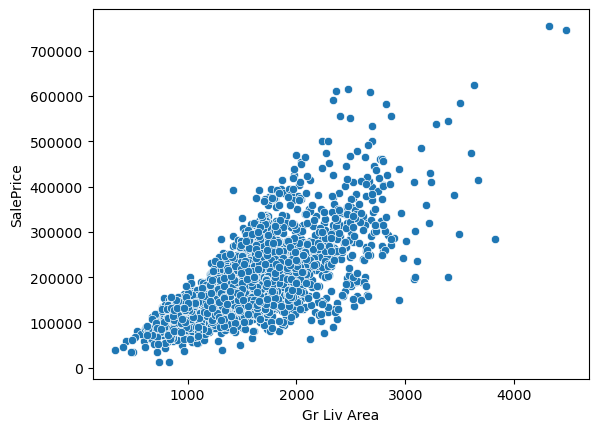

In [194]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = df)

<AxesSubplot:xlabel='Overall Qual'>

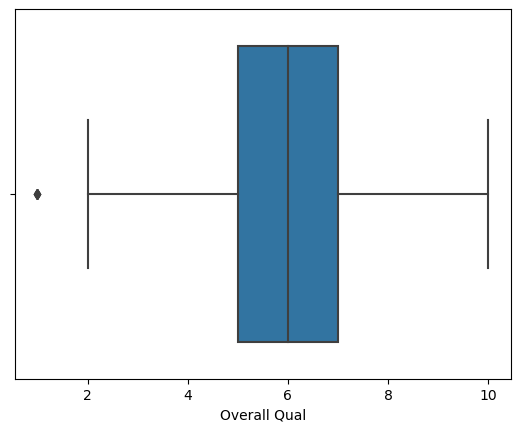

In [195]:
sns.boxplot(data = df, x = 'Overall Qual')

In [196]:
df['Overall Qual'].describe()

count    2927.000000
mean        6.090878
std         1.406195
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64

In [197]:
q75, q25 = np.percentile(df['Overall Qual'], [75, 25])
IQR = q75 - q25
lower_limit = q25 - 1.5 * IQR

In [198]:
lower_limit

2.0

In [199]:
df = df[df['Overall Qual'] > 2]

<AxesSubplot:xlabel='Overall Qual'>

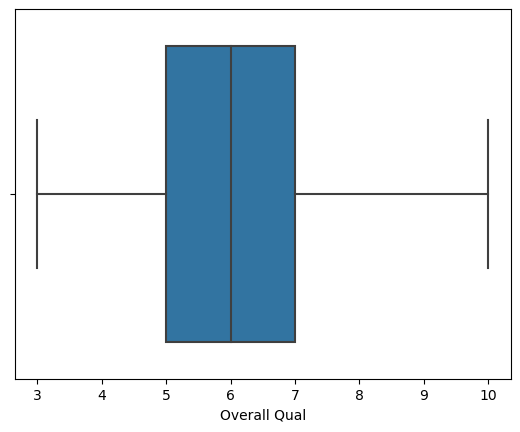

In [200]:
sns.boxplot(data = df, x = 'Overall Qual')

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

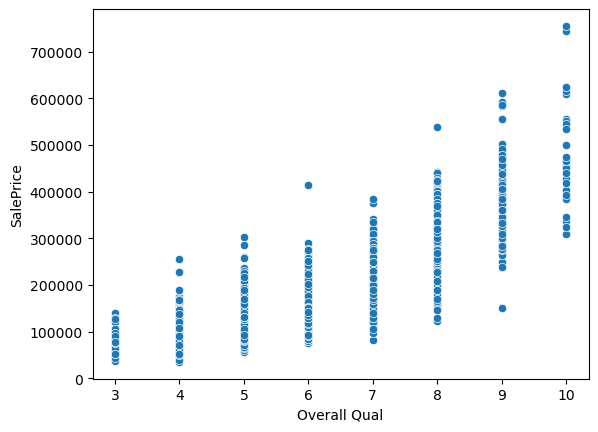

In [201]:
sns.scatterplot(x = 'Overall Qual', y = 'SalePrice', data = df)

In [202]:
# СЧИТАЕТ ПРОЦЕНТ ОТСУТСТВУЮЩИХ ДАННЫХ

In [203]:
def percent_missing (my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)
    result = result[result > 0].sort_values()
    return result

In [204]:
percent_nun = percent_missing(df)

In [205]:
percent_nun

Electrical         0.034364
Garage Area        0.034364
Total Bsmt SF      0.034364
Bsmt Unf SF        0.034364
BsmtFin SF 1       0.034364
BsmtFin SF 2       0.034364
Garage Cars        0.034364
Bsmt Full Bath     0.068729
Bsmt Half Bath     0.068729
Mas Vnr Area       0.790378
Mas Vnr Type       0.790378
BsmtFin Type 1     2.508591
Bsmt Qual          2.508591
Bsmt Cond          2.508591
BsmtFin Type 2     2.542955
Bsmt Exposure      2.611684
Garage Type        5.223368
Garage Finish      5.292096
Garage Qual        5.292096
Garage Cond        5.292096
Garage Yr Blt      5.292096
Lot Frontage      16.769759
Fireplace Qu      48.350515
Fence             80.343643
Alley             93.230241
Misc Feature      96.391753
Pool QC           99.587629
dtype: float64

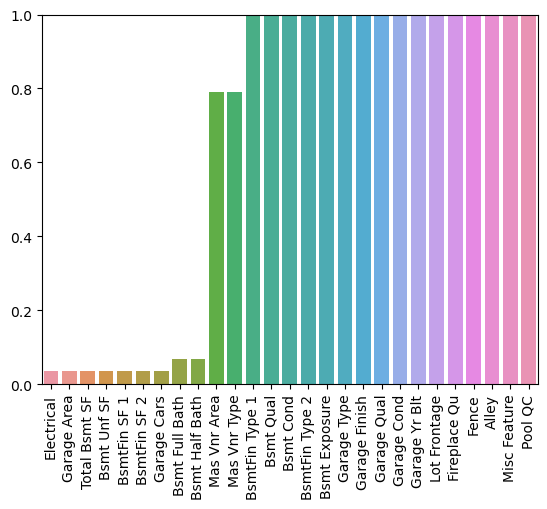

In [206]:
sns.barplot(x = percent_nun.index, y = percent_nun)
plt.xticks(rotation = 90)
plt.ylim(0,1);

In [207]:
percent_nun[percent_nun < 1]

Electrical        0.034364
Garage Area       0.034364
Total Bsmt SF     0.034364
Bsmt Unf SF       0.034364
BsmtFin SF 1      0.034364
BsmtFin SF 2      0.034364
Garage Cars       0.034364
Bsmt Full Bath    0.068729
Bsmt Half Bath    0.068729
Mas Vnr Area      0.790378
Mas Vnr Type      0.790378
dtype: float64

In [208]:
100 / len(df)

0.03436426116838488

In [209]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Area'])

In [210]:
percent_nun = percent_missing(df)

In [211]:
percent_nun[percent_nun < 1]

Bsmt Unf SF       0.034388
Total Bsmt SF     0.034388
BsmtFin SF 2      0.034388
BsmtFin SF 1      0.034388
Bsmt Full Bath    0.068776
Bsmt Half Bath    0.068776
Mas Vnr Type      0.790922
Mas Vnr Area      0.790922
dtype: float64

In [212]:
df[df['Bsmt Half Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [213]:
df[df['Bsmt Full Bath'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [214]:
df[df['Bsmt Unf SF'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [215]:
# для числовых колонок - fillna 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

# для текстовых колонок
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [216]:
percent_nun = percent_missing(df)

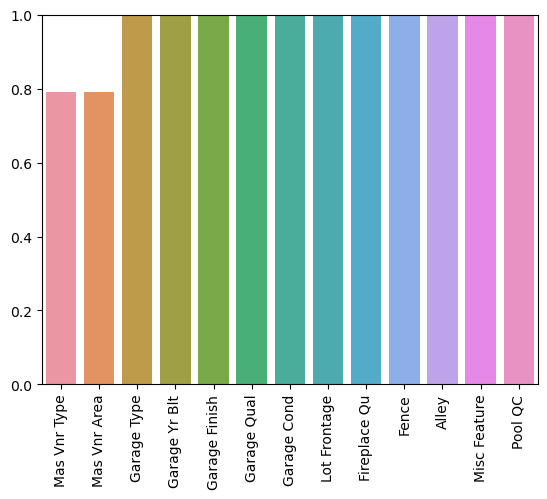

In [217]:
sns.barplot(x = percent_nun.index, y = percent_nun)
plt.xticks(rotation = 90)
plt.ylim(0,1);

In [218]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [219]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [220]:
percent_nun = percent_missing(df)

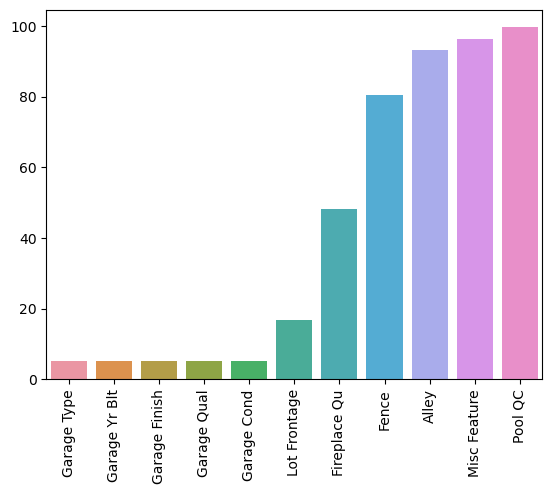

In [221]:
sns.barplot(x = percent_nun.index, y = percent_nun)
plt.xticks(rotation = 90);

In [222]:
gar_srt_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_srt_cols] = df[gar_srt_cols].fillna('None')

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [223]:
percent_nun = percent_missing(df)

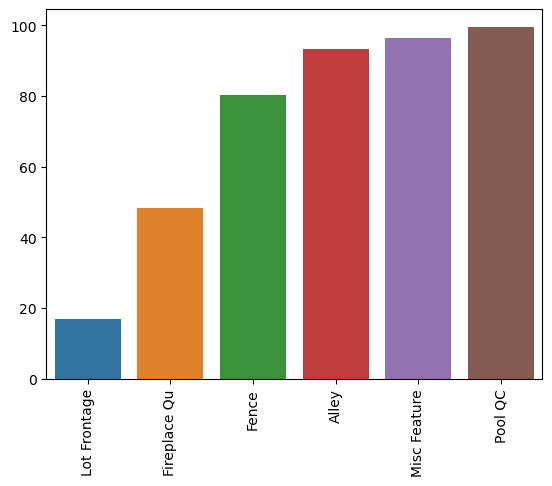

In [224]:
sns.barplot(x = percent_nun.index, y = percent_nun)
plt.xticks(rotation = 90);

In [225]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

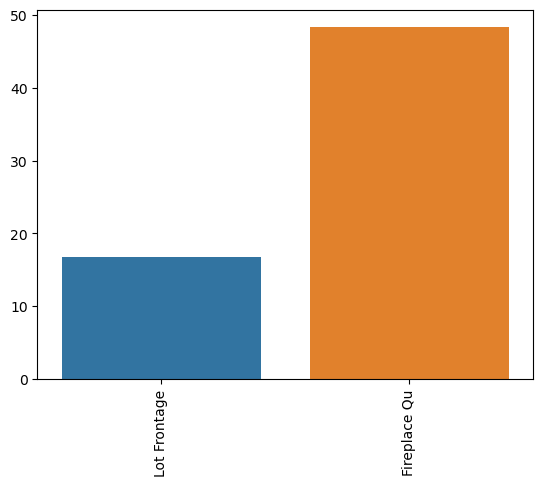

In [226]:
percent_nun = percent_missing(df)
sns.barplot(x = percent_nun.index, y = percent_nun)
plt.xticks(rotation = 90);

In [227]:
df['Fireplace Qu'].value_counts()

Gd    740
TA    600
Fa     75
Po     45
Ex     43
Name: Fireplace Qu, dtype: int64

In [228]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [229]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2908, dtype: float64

In [230]:
df['Lot Frontage'].isnull().sum()

488

In [231]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [232]:
df['Lot Frontage'].isnull().sum()

3

In [233]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [234]:
df['Lot Frontage'].isnull().sum()

0

In [235]:
percent_nun

Lot Frontage    16.781293
Fireplace Qu    48.314993
dtype: float64

In [ ]:
# ФОРМАТИРОВАНИЕ ДАННЫХ

In [236]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [237]:
my_object_df = df.select_dtypes(include = 'object')

In [238]:
my_numeric_df = df.select_dtypes(exclude = 'object')

In [239]:
df_object_dummies = pd.get_dummies(my_object_df, drop_first = True)

In [240]:
df_object_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [241]:
df = pd.concat([my_numeric_df, df_object_dummies], axis=1)

In [242]:
df.head()

,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#  МАШИННОЕ ОБУЧЕНИЕ

In [244]:
X = df.drop('SalePrice', axis = 1)

In [245]:
y = df['SalePrice']

In [246]:
# Разбиение данных на TRAIN и TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [247]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [248]:
# Создание модели ElasticNet
base_elastic_net_model = ElasticNet()

In [249]:
param_grid = {'alpha':[0.1, 0.5, 1, 5, 50, 100], 
              'l1_ratio':[0.1, 0.5, 0.7, 0.95, 0.99, 1]}

In [250]:
# Создание модели GridSearchCV
grid_model = GridSearchCV(estimator = base_elastic_net_model, 
                         param_grid = param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5,
                         verbose=1)

In [251]:
# Обучение моедли
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   19.0s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [252]:
# Оптимальные гипермараметры
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [253]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119652,0.009965,0.000398,0.000488,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-4.676381e+08,-4.742431e+08,-6.085842e+08,-4.516594e+08,-6.598973e+08,-5.324044e+08,8.503524e+07,13
1,0.147569,0.015788,0.000599,0.000489,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-4.626052e+08,-4.675747e+08,-5.953476e+08,-4.473933e+08,-6.444094e+08,-5.234660e+08,8.050988e+07,10
2,0.200154,0.033242,0.000714,0.000956,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-4.624459e+08,-4.659944e+08,-5.889491e+08,-4.470664e+08,-6.367755e+08,-5.202463e+08,7.738033e+07,5
3,0.280434,0.033249,0.002014,0.004027,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-4.684170e+08,-4.719377e+08,-5.835520e+08,-4.534480e+08,-6.327460e+08,-5.220201e+08,7.229117e+07,7
4,0.253827,0.042516,0.001377,0.001061,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-4.717233e+08,-4.810040e+08,-5.831547e+08,-4.569981e+08,-6.376053e+08,-5.260971e+08,7.135013e+07,11
5,0.271764,0.016313,0.000775,0.001550,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-4.742567e+08,-5.151945e+08,-5.827560e+08,-4.582328e+08,-6.418325e+08,-5.344545e+08,6.880050e+07,16
6,0.051766,0.002295,0.000203,0.000405,0.5,0.1,"{'alpha': 0.5, 'l1_ratio': 0.1}",-5.465099e+08,-5.496284e+08,-7.164418e+08,-5.166378e+08,-7.726652e+08,-6.203766e+08,1.035796e+08,21
7,0.049836,0.003636,0.001611,0.001200,0.5,0.5,"{'alpha': 0.5, 'l1_ratio': 0.5}",-5.016498e+08,-5.073209e+08,-6.590210e+08,-4.788550e+08,-7.141171e+08,-5.721928e+08,9.547594e+07,19
8,0.051254,0.006675,0.003251,0.003859,0.5,0.7,"{'alpha': 0.5, 'l1_ratio': 0.7}",-4.794056e+08,-4.862917e+08,-6.280329e+08,-4.609797e+08,-6.814783e+08,-5.472376e+08,8.978245e+07,17
9,0.168142,0.011701,0.001207,0.001483,0.5,0.95,"{'alpha': 0.5, 'l1_ratio': 0.95}",-4.627986e+08,-4.659958e+08,-5.874657e+08,-4.473552e+08,-6.350045e+08,-5.197240e+08,7.647614e+07,3


In [254]:
# Создание и обучение модели с гиперпараметрами alpha = 1, l1_ratio = 1
model = ElasticNet(alpha = 1, l1_ratio = 1)

In [255]:
scores = cross_validate(model, X_train, y_train, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], cv=5)

In [256]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.235347,0.001036,-4.736315e+08,-14606.201716
1,0.247638,0.002365,-5.096932e+08,-15503.635802
2,0.255278,0.000000,-5.828590e+08,-15778.935367
3,0.228688,0.000958,-4.577959e+08,-15030.036358
4,0.240419,0.001251,-6.412046e+08,-16213.299334


In [257]:
scores.mean()

fit_time                        2.414738e-01
score_time                      1.121902e-03
test_neg_mean_squared_error    -5.330368e+08
test_neg_mean_absolute_error   -1.542642e+04
dtype: float64

In [258]:
# Создание и обучение модели с гиперпараметрами alpha = 100, l1_ratio = 1
final_model = ElasticNet(alpha = 100, l1_ratio = 1)

In [259]:
scores_t = cross_validate(final_model, X_train, y_train, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], cv=5)

In [260]:
scores_t = pd.DataFrame(scores_t)
scores_t.mean()

fit_time                        1.188749e-01
score_time                      1.222420e-03
test_neg_mean_squared_error    -5.098964e+08
test_neg_mean_absolute_error   -1.505711e+04
dtype: float64

In [261]:
final_model.fit(X_train, y_train)

ElasticNet(alpha=100, l1_ratio=1)

In [262]:
y_finel_pred = final_model.predict(X_test)

In [263]:
mean_absolute_error(y_test, y_finel_pred)

14368.75589259454

In [264]:
np.sqrt(mean_squared_error(y_test, y_finel_pred))

22453.22593377567

In [265]:
np.mean(df['SalePrice'])

181571.63617606604

In [ ]:
# В результате можно сказать, что модель с гиперпараметрами alpha = 100, l1_ratio = 1 работает лучше, так как 
# test_neg_mean_squared_error и test_neg_mean_absolute_error имеет меньшее значение.